In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('german_credit_data.csv')
# Data preparation
df['Sex'] = df['Sex'].replace(['male'],0)
df['Sex'] = df['Sex'].replace(['female'],1)
df['Housing'] = df['Housing'].replace(['own'],0)
df['Housing'] = df['Housing'].replace(['free'],1)
df['Housing'] = df['Housing'].replace(['rent'],2)
df['Saving accounts'] = df['Saving accounts'].fillna(0)
df['Saving accounts'] = df['Saving accounts'].replace(['little'],1)
df['Saving accounts'] = df['Saving accounts'].replace(['moderate'],2)
df['Saving accounts'] = df['Saving accounts'].replace(['quite rich'],3)
df['Saving accounts'] = df['Saving accounts'].replace(['rich'],4)
df['Checking account'] = df['Checking account'].fillna(0)
df['Checking account'] = df['Checking account'].replace(['little'],1)
df['Checking account'] = df['Checking account'].replace(['moderate'],2)
df['Checking account'] = df['Checking account'].replace(['quite rich'],3)
df['Checking account'] = df['Checking account'].replace(['rich'],4)
df['Purpose'] = df['Purpose'].replace(['radio/TV'],0)
df['Purpose'] = df['Purpose'].replace(['domestic appliances'],1)
df['Purpose'] = df['Purpose'].replace(['furniture/equipment'],2)
df['Purpose'] = df['Purpose'].replace(['repairs'],3)
df['Purpose'] = df['Purpose'].replace(['vacation/others'],4)
df['Purpose'] = df['Purpose'].replace(['car'],5)
df['Purpose'] = df['Purpose'].replace(['education'],6)
df['Purpose'] = df['Purpose'].replace(['business'],7)
df['Risk'] = df['Risk'].replace(['good'],1)
df['Risk'] = df['Risk'].replace(['bad'],0)

dataset = df.values
X = dataset[:,1:10]
Y = dataset[:,10]

X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# fit final model
model = LinearDiscriminantAnalysis()
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
y_sum = 0
for ind in range(len(Y_test)):
    y_sum += Y_test[ind]
y_mean = y_sum / len(Y_test)
ssr = 0
sst = 0
ynew = model.predict(X_test)

for i in range(len(X_test)):
    print("X= {}, True_Y= {} ,Predicted= {}".format(X_test[i], Y_test[i] ,ynew[i]))

print("Accuracy Score:", model.score(X_test,Y_test))

X= [0.08928573 0.         0.6666667  1.         0.25       0.5
 0.11406405 0.47058827 0.        ], True_Y= 1.0 ,Predicted= 0
X= [0.1964286  0.         1.         0.         0.5        0.25
 0.1099923  0.20588237 0.71428573], True_Y= 1.0 ,Predicted= 1
X= [0.42857146 0.         0.33333334 0.         0.25       0.
 0.07059535 0.20588237 0.2857143 ], True_Y= 0.0 ,Predicted= 1
X= [0.5178572  0.         0.6666667  0.         0.25       0.
 0.10366458 0.07352942 0.71428573], True_Y= 1.0 ,Predicted= 1
X= [0.08928573 1.         0.         1.         0.         0.5
 0.3973809  0.11764707 0.71428573], True_Y= 1.0 ,Predicted= 0
X= [0.7678572  1.         0.6666667  0.5        0.25       0.
 0.19296798 0.29411766 0.71428573], True_Y= 1.0 ,Predicted= 1
X= [0.14285713 1.         0.6666667  0.         0.25       0.25
 0.11769561 0.20588237 0.        ], True_Y= 1.0 ,Predicted= 1
X= [0.46428573 1.         0.33333334 0.         0.         0.
 0.19725983 0.47058827 0.        ], True_Y= 1.0 ,Predicted= 1
X=

Age: 0.9415205121040344
Sex: -0.42283251881599426
Job: 0.07696866989135742
Housing: -0.7649696469306946
Saving accounts: 0.28229716420173645
Checking account: -1.2398983240127563
Credit amount: -0.5062436461448669
Duration: -2.240683078765869
Purpose: -0.5645980834960938


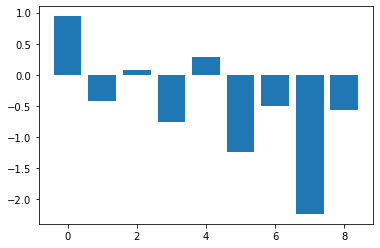

In [6]:
importance = model.coef_
importance = pd.Series(importance[0])
column = pd.DataFrame(df.iloc[:,1:-1]).columns
importance
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{column[i]}: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()